# MOM6 Momentum Budget

Link: https://mom6-analysiscookbook.readthedocs.io/en/latest/notebooks/Closing_momentum_budget.html#Budget-for-depth-av

`dudt = CAu + PFu + u_BT_accel + diffu + du_dt_visc +` residual due to remapping

Start with x direction as velocities bigger

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm
from xgcm import Grid

In [2]:
def open_IC():
    IC = xr.open_dataset('MOM_IC.nc')
    return IC
def open_prog():
    prog = xr.open_dataset('prog.nc')
    return prog
def open_mom():
    mom = xr.open_dataset('mom.nc')
    return mom

In [3]:
IC = open_IC()
prog = open_prog()
mom = open_mom()

In [4]:
mom

<xarray.Dataset>
Dimensions:     (xq: 241, yh: 40, zl: 25, Time: 120, xh: 240, yq: 41)
Coordinates:
  * xq          (xq) float64 320.0 322.0 324.0 326.0 ... 794.0 796.0 798.0 800.0
  * yh          (yh) float64 1.0 3.0 5.0 7.0 9.0 ... 71.0 73.0 75.0 77.0 79.0
  * zl          (zl) float64 14.4 43.2 72.0 100.8 ... 619.2 648.0 676.8 705.6
  * Time        (Time) object 0001-01-01 01:00:00 ... 0001-01-06 00:00:00
  * xh          (xh) float64 321.0 323.0 325.0 327.0 ... 793.0 795.0 797.0 799.0
  * yq          (yq) float64 0.0 2.0 4.0 6.0 8.0 ... 72.0 74.0 76.0 78.0 80.0
Data variables: (12/16)
    dudt        (Time, zl, yh, xq) float64 ...
    dvdt        (Time, zl, yq, xh) float64 ...
    CAu         (Time, zl, yh, xq) float64 ...
    CAv         (Time, zl, yq, xh) float64 ...
    PFu         (Time, zl, yh, xq) float64 ...
    PFv         (Time, zl, yq, xh) float64 ...
    ...          ...
    du_dt_visc  (Time, zl, yh, xq) float64 ...
    dv_dt_visc  (Time, zl, yq, xh) float64 ...
    gKEu        (Time, zl, yh, xq) float64 ...
    gKEv        (Time, zl, yq, xh) float64 ...
    rvxu        (Time, zl, yq, xh) float64 ...
    rvxv        (Time, zl, yh, xq) float64 ...
Attributes:
    filename:   mom.nc
    title:      GOLD Experiment
    grid_type:  regular
    grid_tile:  N/A

Let us first plot the x momentum balance in bottom layer at time t = 1 h

Text(0.5, 0.98, 'Time = 1 hour, Bottom Layer')

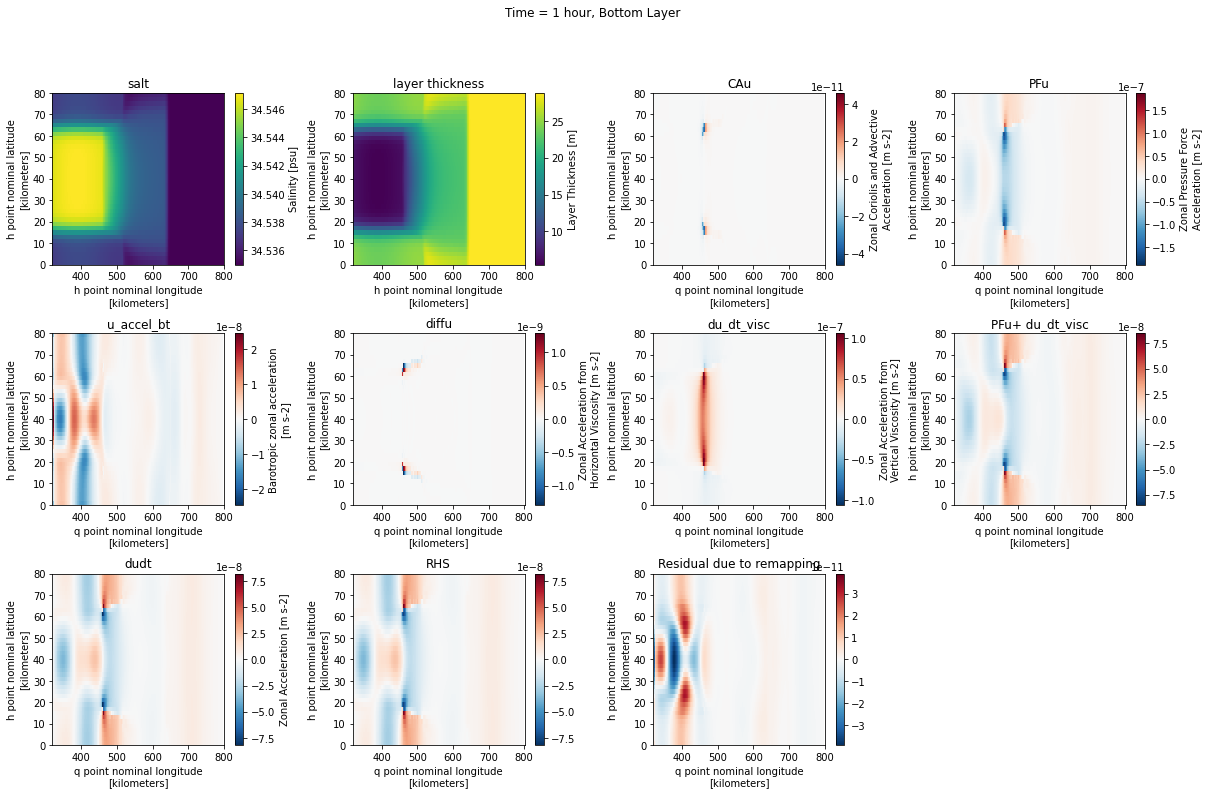

In [5]:
tt = 0
zz = -1
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')


mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 1 hour, Bottom Layer')

Text(0.5, 0.98, 'Time = 5 days, Bottom Layer')

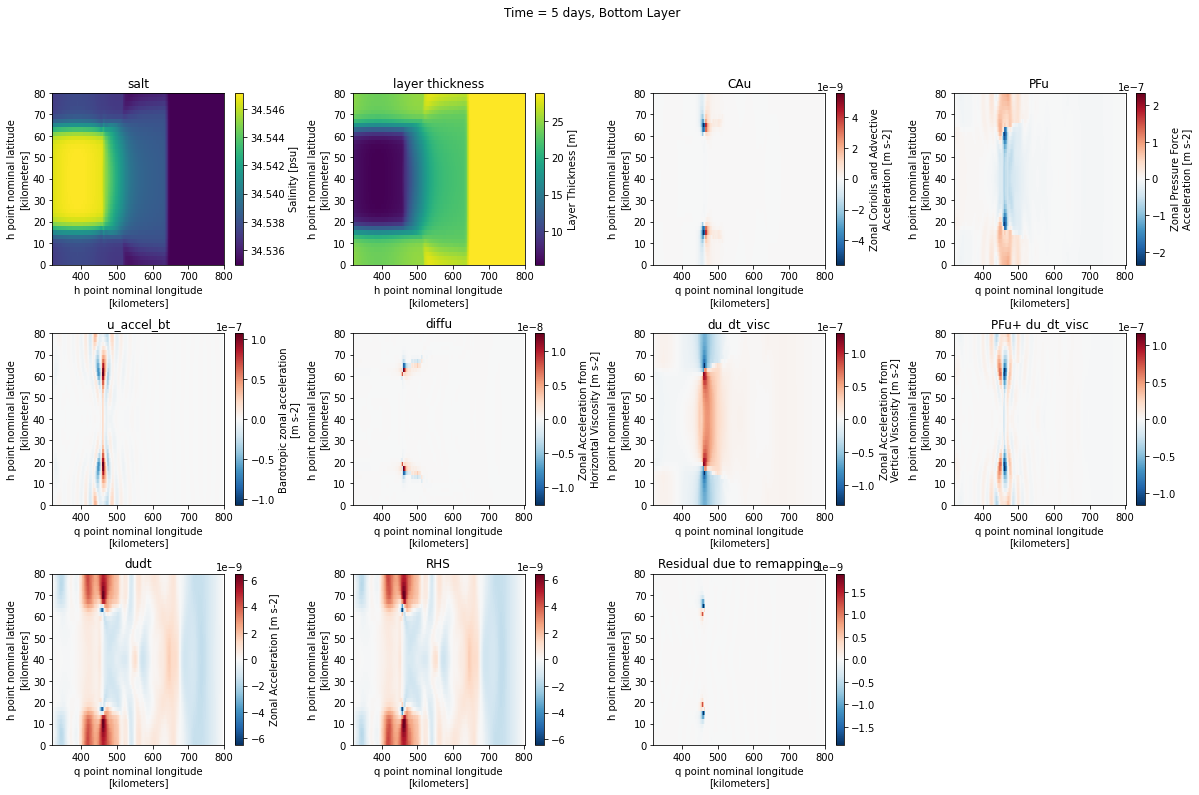

In [6]:
tt = -1
zz = -1
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')

mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

#axes[1,3].axis('off')
axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 5 days, Bottom Layer')

Text(0.5, 0.98, 'Time = 1 hour, Top Layer')

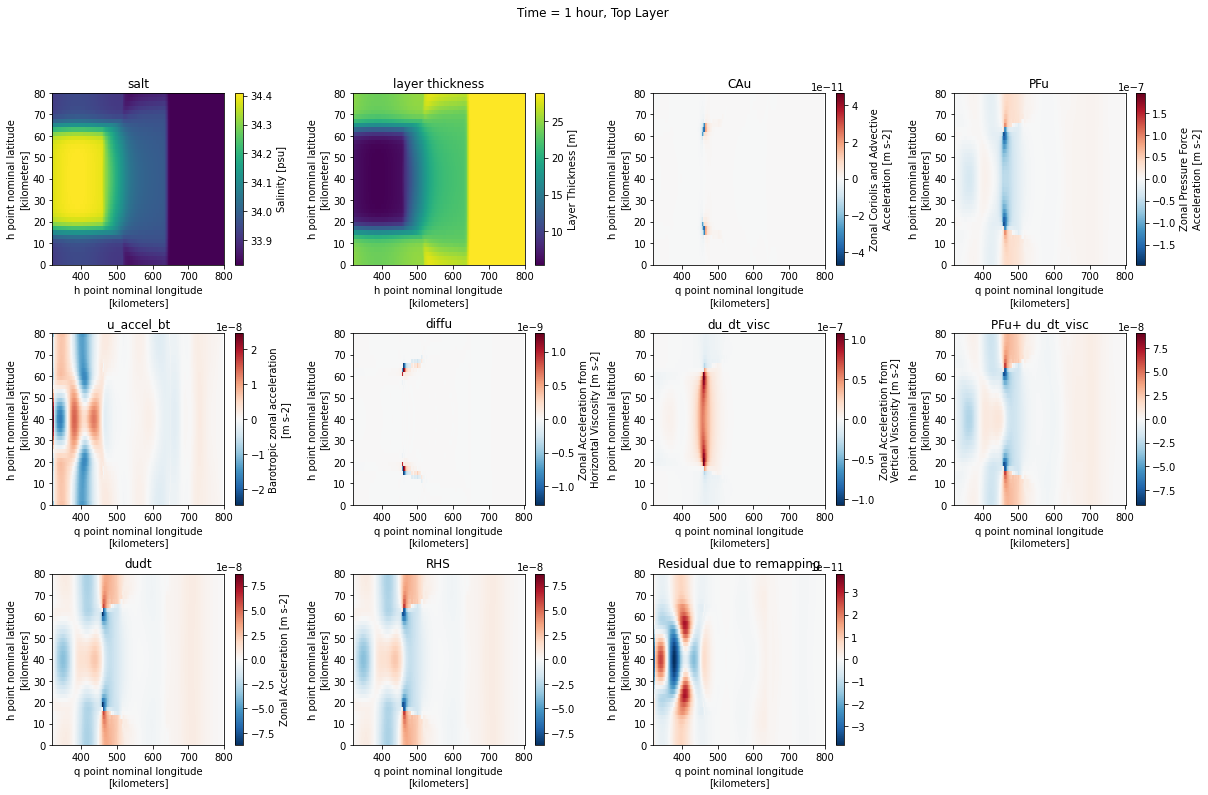

In [7]:
tt = 0
zz = 0
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')

mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

#axes[1,3].axis('off')
axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 1 hour, Top Layer')

Text(0.5, 0.98, 'Time = 5 days, Top Layer')

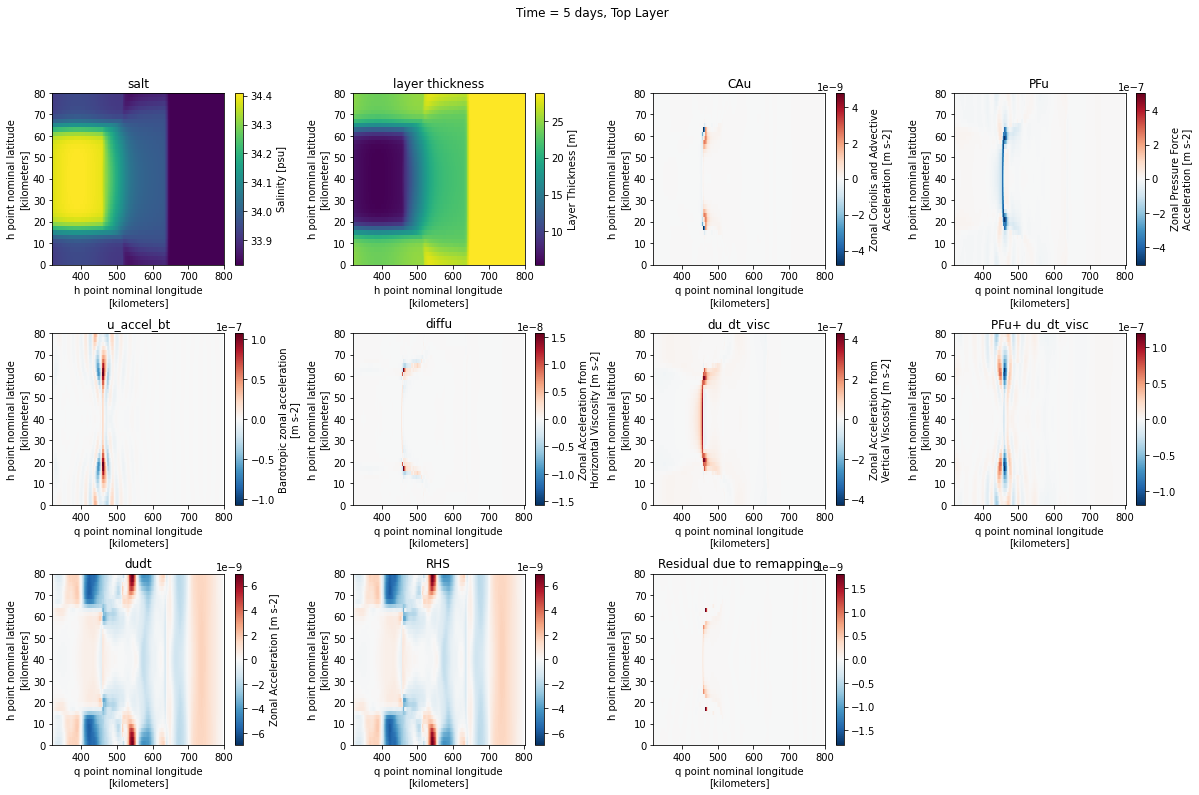

In [8]:
tt = -1
zz = 0
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')

mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

#axes[1,3].axis('off')
axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 5 days, Top Layer')

In [9]:
ave = False ## True means use 5 daily average rather than hourly prog
def open_files():
    base = folder
    if ave:
        prog = xr.open_dataset('ave_prog.nc')
    else:
        prog = xr.open_dataset('prog.nc')
    ocean_static = xr.open_dataset("ocean_geometry.nc")
    return prog, ocean_static
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog, ocean_static = open_files()
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = folder
    label = folder
    depth = grid.interp(prog.e,'x')
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if varname == "uo": dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) #Dummy, just for have z_levels
    # plot variable in colours
    xi, yyi = np.meshgrid(xx[yy0,:], yi) #We repeat the horizontal part of the grid by the number of zlevels
    #cax = ax.contourf(xi,yy[tt,...],dataplot[tt,:,yy0,:],levels = levels, cmap = cmap, extend = 'both',corner_mask = False)
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_34162/2581490130.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


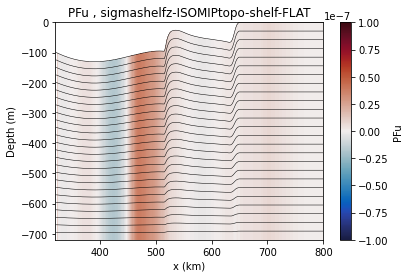

In [12]:
label = 'sigmashelfz-ISOMIPtopo-shelf-FLAT'
mom = open_mom()
folder = label

fig,axes = plt.subplots()
time = 0 
x = 0
ymax = 720
#plot temp
plot(axes,x,time,0,mom.PFu,"PFu",-1e-7,1e-7,cm.cm.balance,ymax)

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_34162/2581490130.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


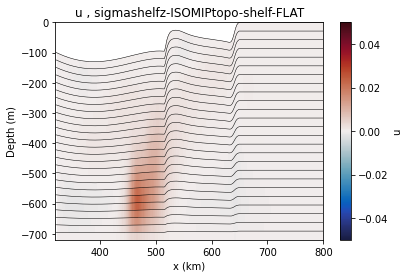

In [21]:
label = 'sigmashelfz-ISOMIPtopo-shelf-FLAT'
prog, ocean_static = open_files()
folder = label

fig,axes = plt.subplots()
time = -1
x = 0
ymax = 720
#plot temp
plot(axes,x,time,0,prog.u,"u",-5e-2,5e-2,cm.cm.balance,ymax)